#**Dataset** **details**

Based on the medical measurements used in the dataset, the purpose of the dataset is to diagnostically determine whether or not a person has diabetes.

Multiple medical prediction variables and one outcome attribute compose datasets. Predictor factors include the patient's number of births, their BMI, level of insulin, age, and so on.

In [451]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

diabetes_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Machine Learning/Project 1/diabetes.csv")


In [452]:
diabetes_data.shape

(768, 9)

In [453]:
diabetes_data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


###Outcome
Class variable (0 or 1) 268 of 768 are 1, the others are 0

There are not as many people with diabetes as people with non-diabetes. Because of a limited number of cases, it is popular in medical diagnosis. We call it as Imbalanced data.

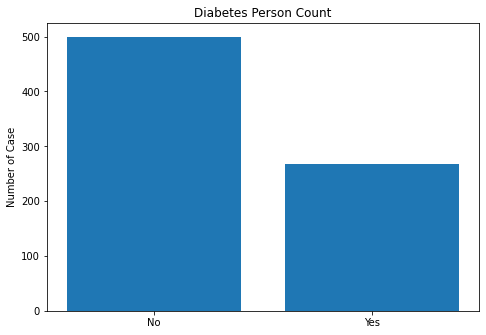

In [454]:
fig = plt.figure()
count=diabetes_data['Outcome'].value_counts()
ax = fig.add_axes([0,0,1,1])
ax.set(xticklabels = ["No", "Yes"])
outcome_ = ['0', '1']
count_bar = [count[0],count[1]]
ax.bar(outcome_,count_bar)
plt.ylabel('Number of Case')
plt.title('Diabetes Person Count')
plt.show()


###Correlation Between Features

An significant part of the method of data processing is the testing of associations. This analysis is one of the tools used to assess which attributes most influence the target variable, and is used in the prediction.

Here we found that Glucose, BMI, Age and then Pregnancies are main feature which plays important role in prediction of outcome variable in this dataset.

Text(0.5, 1.0, 'Correlation between features')

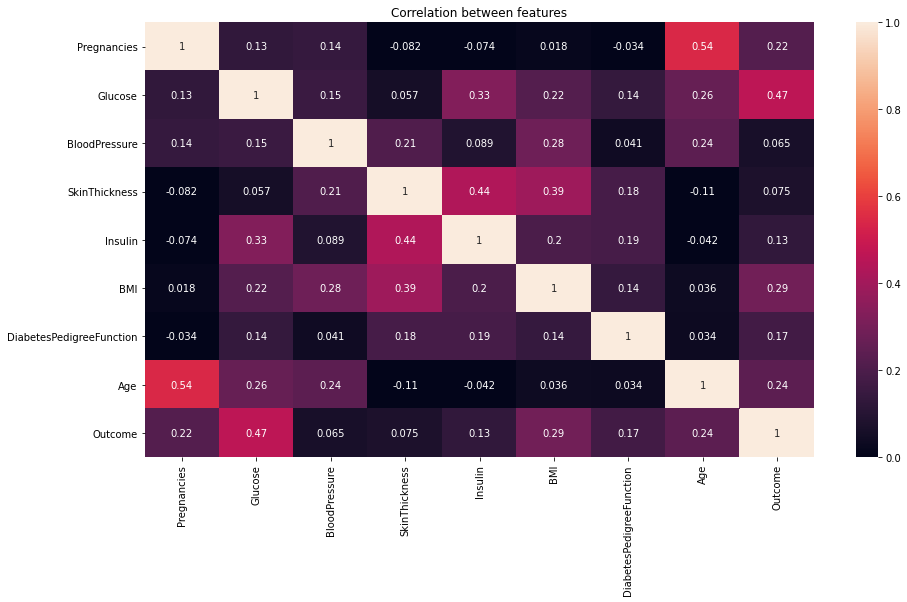

In [455]:
import seaborn as sns
plt.figure(figsize=(15,8))
sns.heatmap(diabetes_data.corr(),annot = True,fmt='.2g',vmin=0, vmax=1)
plt.title('Correlation between features')

###Complete Data Distribution

This is a complete representation of the distribution of data provided to us in histogram format

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0eea1a7828>,
      dtype=object)

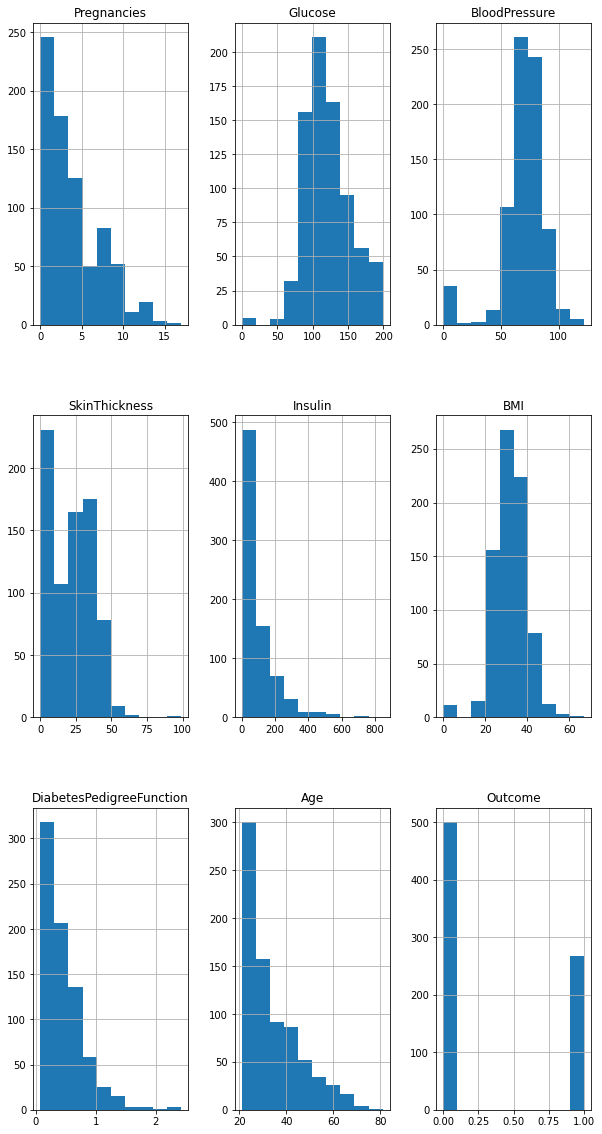

In [456]:
diabetes_data.hist(figsize=(10,20))

By this plot we can see that the person whose glucose level is high are most likely to be diabetic. As well as we can also say that person having both insulin level and glucose level high are most likely to be diabetic

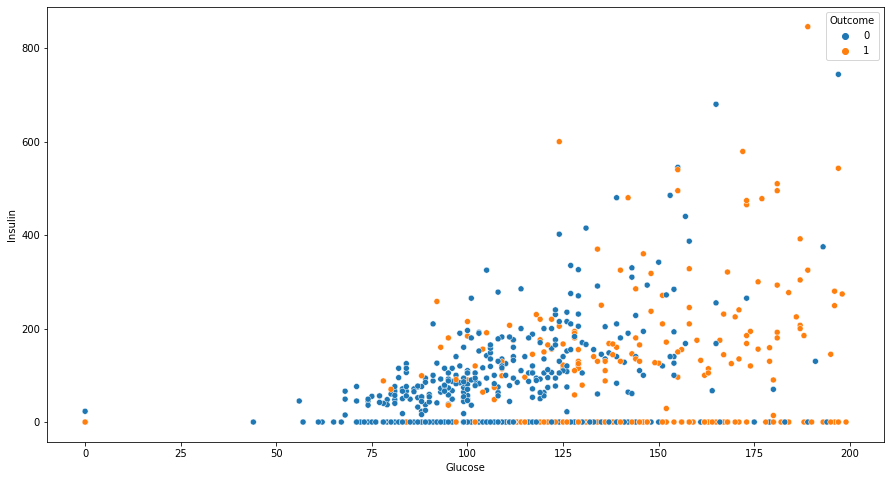

In [457]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=diabetes_data, x="Glucose", y="Insulin", hue="Outcome")

###Train-Test Split of Data

The train-test split is a technique for testing a machine learning algorithm's output. This involves a dataset being taken and divided into two parts. First part is used to train/fit the model and is referred to as the training dataset. The second part is not used to train the algorithm instead, it is used to give input element of the dataset, then predictions are made and the predicted values are compared. This second dataset is known as test dataset.

In this dataset I have choose a 20% split percentage. That is 80% would be my training set and 20% would be my test set. I have taken this split by considering several parameters like computational cost in both training and testing the model. As well as representativeness of training set.

In [458]:
from sklearn.model_selection import train_test_split

X_diabetes_data=diabetes_data.drop(['Outcome'],1).values
y_diabetes_data=diabetes_data['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X_diabetes_data, y_diabetes_data,test_size=0.2,random_state=0)


#Algorithm Description

###KNN Algorithm 

In K, meaning algorithm, we would look at the K nearest training data points for each test data point and take the most frequently occurring classes and assign the test data to that class. K reflects the sum of training data points that lie near the evaluation data point that we are going to use to locate the class.

1. Load the training and test data 
2. Choose the value of K 
3. For each point in test data:
       - find the distance to all training data points
       - store the distances in a list and sort it 
       - choose the first k points 
       - assign a class to the test point based on the majority of classes present in the chosen points
4. End

### Feature Scaling

####Standardization

The algorithm should not be biased towards variables with higher magnitude. To overcome this problem, we can bring down all the variables to the same scale. One of the most common technique to do so is normalization where we calculate the mean and standard deviation of the variable. Then for each observation, we subtract the mean and then divide by the standard deviation of that variable:


x = (x-u)/sigma 

Where x is the original feature vector, 'u' is the mean of that feature vector, and sigma is its standard deviation.

In [459]:
def standardise(X_train,X_test):
    mean = np.mean(X_train, axis=0)
    scale = np.std(X_train, axis=0, ddof=1)
    X_std = (X_train - mean) / scale
    Xte_std = (X_test - mean) / scale
    return X_std,Xte_std

In [460]:
X_train,X_test = standardise(X_train,X_test)

###Distance Metrics

####Euclidean distance
The Euclidean distance between two points in either the plane or 3-dimensional space measures the length of a segment connecting the two points. It is the most obvious way of representing distance between two points.

The Pythagorean Theorem can be used to calculate the distance between two points, as shown in the figure below. If the points (x1,y1) and (x2,y2) are in 2-dimensional space, then the Euclidean distance between them is (x2−x1)2+(y2−y1)2‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾√.



In [461]:
def Euclidean(x1, x2): #it is used for calculating euclidean distance
    z = np.subtract(x1, x2)
    t = np.square(z)
    distance = np.sum(t)
    return np.sqrt(distance)

####Manhattan Distance
The Manhattan distance between two vectors (city blocks) is equal to the one-norm of the distance between the vectors.
The Manhattan distance as the sum of absolute differences

ManhattanDistance [{a, b, c}, {x, y, z}] = Abs [a − x] + Abs [b − y] + Abs [c − z]

In [462]:
def Manhattan(x1, x2): #it is used for calculating Manhattan distance
    distance = 0
    for x in range(len(x1)-1):
        distance += abs(x1[x] - x2[x])
    return distance

####Chebyshev distance

The Chebyshev distance calculation, commonly known as the "maximum metric" in mathematics, measures distance between two points as the maximum difference over any of their axis values. In a 2D grid, for instance, if we have two points (x1, y1), and (x2, y2), the Chebyshev distance between is max(y2 - y1, x2 - x1).



In [463]:
def Chebyshev(x1, x2): #it is used for calculating Chebyshev distance
    distance = []
    for x in range(len(x1)-1):
        distance.append(abs(x1[x] - x2[x]))
    max_val = max(distance)
    return max_val

Evaluation Funciton to find accuracy

In [464]:
def evaluate(y_pred,y_test):
  correct = 0
  for y_pred__,y_test__ in zip(y_pred,y_test):
    if y_pred__== y_test__:
      correct +=1
  return correct/len(y_test)

Chebyshev Distance Metric

In [465]:
def knn(X_train,X_test,y_train,k):
  che_distances = {}
  for x in range(len(X_train)):
      distance = Chebyshev(X_train[x], X_test)
      che_distances[x] = distance
  sortdist = sorted(che_distances.items(), key=lambda x: x[1])

  #To get K neighbours
  neighbors = []
  for x in range(k):
      neighbors.append(sortdist[x][0])

  class_count = {} #to get most frequent class of rows
  for x in range(len(neighbors)):
      class_y = y_train[neighbors[x]]
      if class_y in class_count:
          class_count[class_y] += 1
      else:
          class_count[class_y] = 1

  sort_count = sorted(class_count.items(), key=lambda x: x[1], reverse=True)
  return sort_count[0][0]


In [466]:
import time
start = time.time()
y_pred = []

for data in X_test:
  z = knn(X_train,data,y_train,k=3)
  y_pred.append(z)

v = evaluate(y_pred,y_test)

end = time.time()
print(f"Accuracy for Chebyshev: {v*100}"+"%")
print(f"Runtime of the program is {end - start}")

Accuracy for Chebyshev: 74.67532467532467%
Runtime of the program is 0.5579440593719482


In [467]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

Confusion Matrix
[[88 19]
 [21 26]]


Text(0.5, 15.0, 'Predicted label')

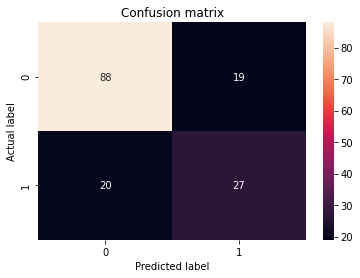

In [468]:
print("Confusion Matrix")
c_matrix = confusion_matrix(y_test,y_pred)
print(matrix)

pd.crosstab(np.array(y_test), np.array(y_pred), rownames=['Actual'], colnames=['Predicted'], margins=True)

p = sns.heatmap(pd.DataFrame(c_matrix), annot=True,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [469]:
accuracy_score(y_test, y_pred)

0.7467532467532467

Manhattan Distance Metric

In [470]:
def knn(X_train,X_test,y_train,k):
  man_distances = {}
  for x in range(len(X_train)):
      distance = Manhattan(X_train[x], X_test)
      man_distances[x] = distance
  sortdist = sorted(man_distances.items(), key=lambda x: x[1])

  #To get K neighbours
  neighbors = []
  for x in range(k):
      neighbors.append(sortdist[x][0])

  class_count = {} #to get most frequent class of rows
  for x in range(len(neighbors)):
      class_y = y_train[neighbors[x]]
      if class_y in class_count:
          class_count[class_y] += 1
      else:
          class_count[class_y] = 1
 
  sort_count = sorted(class_count.items(), key=lambda x: x[1], reverse=True)
  return sort_count[0][0]


In [471]:
import time
start = time.time()
y_pred = []

for data in X_test:
  z = knn(X_train,data,y_train,k=3)
  y_pred.append(z)

v = evaluate(y_pred,y_test)
end = time.time()
print(f"Accuracy for Manhattan: {v*100}"+"%")
print(f"Runtime of the program is {end - start}")

Accuracy for Manhattan: 74.02597402597402%
Runtime of the program is 0.5457980632781982


Confusion Matrix
[[88 19]
 [21 26]]


Text(0.5, 15.0, 'Predicted label')

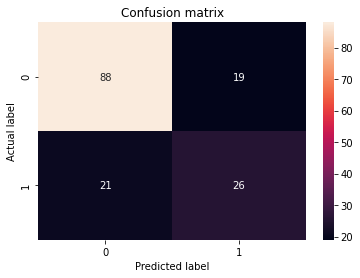

In [472]:
print("Confusion Matrix")
c_matrix = confusion_matrix(y_test,y_pred)
print(matrix)

pd.crosstab(np.array(y_test), np.array(y_pred), rownames=['Actual'], colnames=['Predicted'], margins=True)

p = sns.heatmap(pd.DataFrame(c_matrix), annot=True,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [473]:
accuracy_score(y_test, y_pred)

0.7402597402597403

Euclidean Distance Metric

In [474]:
def knn(X_train,X_test,y_train,k):
  euc_distances = {}
  for x in range(len(X_train)):
      distance = Euclidean(X_train[x], X_test)
      euc_distances[x] = distance
  sortdist = sorted(euc_distances.items(), key=lambda x: x[1])

  #To get K neighbours
  neighbors = []
  for x in range(k):
      neighbors.append(sortdist[x][0])

  class_count = {} #to get most frequent class of rows
  for x in range(len(neighbors)):
      class_y = y_train[neighbors[x]]
      if class_y in class_count:
          class_count[class_y] += 1
      else:
          class_count[class_y] = 1
 
  sort_count = sorted(class_count.items(), key=lambda x: x[1], reverse=True)
  return sort_count[0][0]


In [475]:
import time
start = time.time()
y_pred = []

for data in X_test:
  z = knn(X_train,data,y_train,k=3)
  y_pred.append(z)

v = evaluate(y_pred,y_test)
end = time.time()
print(f"Accuracy for Euclidean: {v*100}"+"%")
print(f"Runtime of the program is {end - start}")

Accuracy for Euclidean: 74.02597402597402%
Runtime of the program is 0.8762071132659912


Confusion Matrix
[[88 19]
 [21 26]]


Text(0.5, 15.0, 'Predicted label')

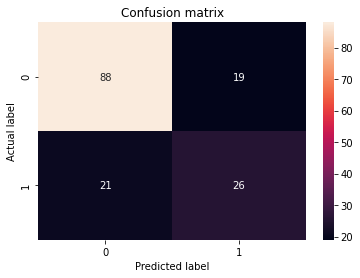

In [476]:
print("Confusion Matrix")
c_matrix = confusion_matrix(y_test,y_pred)
print(matrix)

pd.crosstab(np.array(y_test), np.array(y_pred), rownames=['Actual'], colnames=['Predicted'], margins=True)

p = sns.heatmap(pd.DataFrame(c_matrix), annot=True,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [477]:
accuracy_score(y_test, y_pred)

0.7402597402597403

# Feature Engineering - 

Use the below cell to do feature selection for better accuracy




In [478]:
#Uncomment the below code to get the better accuracy by feature selection

from sklearn.model_selection import train_test_split

X_diabetes_data=diabetes_data.drop(['Outcome','BloodPressure','DiabetesPedigreeFunction','SkinThickness','Age'],1).values
y_diabetes_data=diabetes_data['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X_diabetes_data, y_diabetes_data,test_size=0.2,random_state=0)
X_train,X_test = standardise(X_train,X_test)

In [488]:
def knn(X_train,X_test,y_train,k):
  euc_distances = {}
  for x in range(len(X_train)):
      distance = Euclidean(X_train[x], X_test)
      # distance = Manhattan(X_train[x], X_test)
      # distance = Chebyshev(X_train[x], X_test)
      
      euc_distances[x] = distance
  sortdist = sorted(euc_distances.items(), key=lambda x: x[1])
  neighbors = []
  for x in range(k):
      neighbors.append(sortdist[x][0])
  
  class_count = {} #to get most frequent class of rows
  for x in range(len(neighbors)):
      class_y = y_train[neighbors[x]]
      if class_y in class_count:
          class_count[class_y] += 1
      else:
          class_count[class_y] = 1 
  sort_count = sorted(class_count.items(), key=lambda x: x[1], reverse=True)
  return sort_count[0][0]


Euclidean Distance

In [480]:
y_pred = []

for data in X_test:
  z = knn(X_train,data,y_train,k=3)
  y_pred.append(z)

v = evaluate(y_pred,y_test)
print(v)

0.8376623376623377


Manhattan Distance

In [485]:
y_pred = []

for data in X_test:
  z = knn(X_train,data,y_train,k=3)
  y_pred.append(z)

v = evaluate(y_pred,y_test)
print(v)

0.7727272727272727


Chebyshev Distance

In [487]:
y_pred = []

for data in X_test:
  z = knn(X_train,data,y_train,k=3)
  y_pred.append(z)

v = evaluate(y_pred,y_test)
print(v)

0.7207792207792207
